In [1404]:
import scipy.io as sc
faces = sc.loadmat('face.mat')

In [1405]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
faces_content = sio.loadmat('face.mat')
faces_content


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

## Now we will split data into training and test using ratio of 80%-20%

[[221  99  58 ...  93 227 100]
 [225 100  58 ...  95 232 102]
 [226 100  57 ...  81 235 132]
 ...
 [ 79 114 167 ...  88  43  44]
 [ 78 118 171 ... 100  45  44]
 [ 80 120 171 ...  91  46  47]]
[[38 40  6 28  7 41 32 24  8 22  1 44 36 30 32 51 48 17  1 25 46  1 42 47
  23 33 18 33 20 15 13 46  6 20 42 44 52 42 28  6 50 22  4 39 30 21 20  6
   8  3 22  1 46 43 40  1 15 27 14 22 13  3  7  3 48  2 18 41 48 20  7 52
  26  9 38 32 19 51 49 17 51 40 21 23 34 51  6 20 25 31 36 17 11 34  7 37
  19 46 47 32  9 44 35 42 10 52 49 46 30 10  2 35 20 15 16 16 50 51 17  9
  25 29  7 33 32 15 11 42  1 44 23  2 15 28 52  4 12 49 11 28 33 18 27 12
  17 45 13 41 12 38 37 35 14 37 26 30 41 42 26 24 14  4 51  5  7 20 29 48
  31 22  8  4 31  3 39 52 49 22  3 36 31 16 36 37 14 22 11 42 37 40 22 41
  19 22 45 21 24 26  7  3 22 31 23 13 12 17 45 42  5 28 46  8 33 34  2 29
  44 26 23 17  9 12 51 12 15 16  2 36 34 11 38 14 24 27 41 32 33 43 25 35
  41  2 33 30 27 23 41  1 37 13 29 29  8 19 44 51 28 30 50 19 48  9 

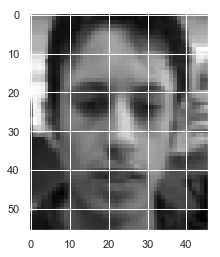

In [1406]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import collections 
from itertools import groupby

face_data = faces_content['X']
face_id = faces_content['l']

X_train, X_test = train_test_split(face_data.T, test_size = 0.2, random_state = 0)
Y_train, Y_test = train_test_split(face_id.T, test_size = 0.2, random_state = 0)

face_train = X_train.T
face_train_id = Y_train.T
face_test = X_test.T
face_test_id = Y_test.T

print(face_train)
print(face_train_id)
print(face_test_id)

face_5 = np.reshape(face_train[:,27],(46,56))
plt.imshow(face_5.T, cmap = 'gist_gray')

#face_n = np.reshape(face_data[:,379],(46,56))
#plt.imshow(face_n.T, cmap = 'gist_gray')

#idx_trainid=np.argsort(np.abs(face_train_id)) #sort the eigenavalues in descending order
#face_train_id_sort = face_train_id[idx_trainid]


    

### Seing How Evenly split the data is

In [1407]:
from itertools import groupby
reps = []

face_train_id_sorted = np.sort(face_train_id) #sort the train ids in order
print(face_train_id_sorted)

for i in range (1, 53):
    count = 0
    for j in range(0, 416):
        if (face_train_id_sorted.ravel()[j] == i):
            count += 1
    reps.append(count)
    
reps_l = np.asarray(reps)

print(reps_l)      


[[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3
   3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6  6
   6  6  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9
   9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 12
  12 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15
  15 15 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 19
  19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
  21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 24 24 24 24
  25 25 25 25 25 25 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 28 28
  28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30
  31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33
  34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 36 36 36 36 36 36 36 36 37
  37 37 37 37 37 37 37 37 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 40
  40 40 40 40 40 40 40 40 40 41 41 41 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]


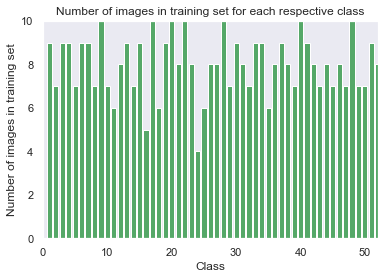

8.0


In [1408]:
plt.figure()
plt.axis([0,52, 0, 10])
index = np.arange(len(reps_l))
print (index)
plt.bar(index+1, reps_l, color = 'g', edgecolor = 'w')
plt.title('Number of images in training set for each respective class')
plt.ylabel('Number of images in training set')
plt.xlabel('Class')
plt.grid(False)
plt.savefig('NumberOfReps.pdf', format='pdf', dpi=300)
plt.show()


avg = sum(reps_l)/len(reps_l)
print(avg)

# Question 1: PCA

### As can be seen, the training data of pixels corresponds to the training data of IDs. Next up, we will perform PCA, ie find the eigenvectors and eigenvalues. We don't need to normalise and centralise the data.

(2576,)
(2576,)


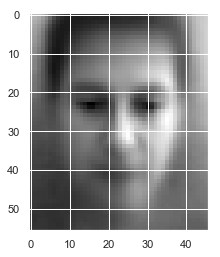

In [1409]:
average_face=np.average(face_train.T, axis = 0)
print(average_face.shape)
face_aver = np.reshape(average_face,(46,56))
plt.imshow(face_aver.T, cmap = 'gist_gray')

average_face_test = np.average(face_test.T, axis = 0)
print(average_face_test.shape)
#face_aver_test = np.reshape(average_face_test,(46,56))
#plt.imshow(face_aver_test.T, cmap = 'gist_gray')

### Average looks alright

In [1410]:
norm_face_t = face_train.T - average_face.T
norm_face = norm_face_t.T
print(norm_face.shape)
print('suka')
print(norm_face)
print(norm_face.shape)

(2576, 416)
suka
[[ 97.05288462 -24.94711538 -65.94711538 ... -30.94711538 103.05288462
  -23.94711538]
 [101.25480769 -23.74519231 -65.74519231 ... -28.74519231 108.25480769
  -21.74519231]
 [105.19471154 -20.80528846 -63.80528846 ... -39.80528846 114.19471154
   11.19471154]
 ...
 [ -7.82932692  27.17067308  80.17067308 ...   1.17067308 -43.82932692
  -42.82932692]
 [ -6.69471154  33.30528846  86.30528846 ...  15.30528846 -39.69471154
  -40.69471154]
 [ -3.04086538  36.95913462  87.95913462 ...   7.95913462 -37.04086538
  -36.04086538]]
(2576, 416)


### Covariance Matrix S

In [1411]:
N=416

S = np.dot(norm_face,norm_face.T)/N
print(S)
print(S.shape)

[[2717.76643399 2574.59950536 2344.8671066  ... -539.14123752
  -585.75412583 -572.52908885]
 [2574.59950536 2794.33891919 2634.29894369 ... -533.05550804
  -576.92153985 -569.14824103]
 [2344.8671066  2634.29894369 2752.85872203 ... -530.12457817
  -569.28540472 -551.53050458]
 ...
 [-539.14123752 -533.05550804 -530.12457817 ... 2877.43000532
  2743.60654933 2622.85312847]
 [-585.75412583 -576.92153985 -569.28540472 ... 2743.60654933
  2963.05343357 2858.15430265]
 [-572.52908885 -569.14824103 -551.53050458 ... 2622.85312847
  2858.15430265 3003.77958002]]
(2576, 2576)


### Find eigvals and eigvecs of S


In [1412]:
import time
start_time = time.time()

eigvals, eigvecs = np.linalg.eig(S)

print(eigvals)
print('suka')
print(eigvecs)
print(eigvals.shape)
print(eigvecs.shape)

print("--- %s seconds ---" % (time.time() - start_time))

eigvecs_float = eigvecs.astype('float64')

[ 9.56846588e+05+0.0000000e+00j  5.31930209e+05+0.0000000e+00j
  4.55028542e+05+0.0000000e+00j ...  2.33215619e-13+5.2746482e-14j
  2.33215619e-13-5.2746482e-14j -7.96684020e-14+0.0000000e+00j]
suka
[[-1.14878149e-02+0.j          1.78896422e-02+0.j
  -1.52988695e-02+0.j         ... -3.74288638e-05+0.00123131j
  -3.74288638e-05-0.00123131j -4.79804257e-04+0.j        ]
 [-1.24027394e-02+0.j          1.75147272e-02+0.j
  -1.62413323e-02+0.j         ... -1.90379107e-04+0.00040518j
  -1.90379107e-04-0.00040518j -4.06430253e-04+0.j        ]
 [-1.30041096e-02+0.j          1.65703203e-02+0.j
  -1.86062571e-02+0.j         ... -1.62617279e-04+0.00039535j
  -1.62617279e-04-0.00039535j -4.34285555e-05+0.j        ]
 ...
 [ 2.85477901e-03+0.j         -4.96944794e-02+0.j
  -1.62049717e-03+0.j         ... -9.37833049e-03+0.01602432j
  -9.37833049e-03-0.01602432j -7.49886640e-03+0.j        ]
 [ 2.64786517e-03+0.j         -4.86687095e-02+0.j
  -1.53852128e-03+0.j         ... -4.37742162e-03-0.00977295j


/Users/Freshbox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


### Plotting eigvals of S

/Users/Freshbox/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


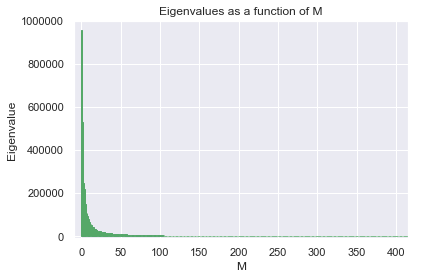

In [1413]:
plt.figure()
plt.axis([-10,416, -10000, 1000000])
index = np.arange(len(eigvals))
plt.bar(index, eigvals, edgecolor = 'g')
plt.title('Eigenvalues as a function of M')
plt.ylabel('Eigenvalue')
plt.xlabel('M')
plt.grid(True)
plt.savefig('Eigvals.pdf', format='pdf', dpi=300)
plt.show()

### Finding the right M

In [1414]:
idx=np.argsort(np.abs(eigvals))[::-1] #sort the eigenavalues in descending order
eigvals_sort = eigvals[idx]
print(eigvals_sort)
eigvecs_sort = eigvecs[idx]
print(eigvecs_sort)



b = sum(eigvals)
print(b)

b_14 = sum(eigvals[0:13]) #13 eigenvalues give 70.56% reconstruction accuracy
print(b_14/b)

b_27 = sum(eigvals[0:26]) #13 eigenvalues give 80.12% reconstruction accuracy
print(b_27/b)

b_66 = sum(eigvals[0:65]) #13 eigenvalues give 90.06% reconstruction accuracy
print(b_66/b)

b_123 = sum(eigvals[0:122]) #13 eigenvalues give 95.01% reconstruction accuracy
print(b_123/b)

b_270 = sum(eigvals[0:269]) #13 eigenvalues give 99.00% reconstruction accuracy
print(b_270/b)



[ 9.56846588e+05+0.00000000e+00j  5.31930209e+05+0.00000000e+00j
  4.55028542e+05+0.00000000e+00j ...  2.64761094e-14+1.12638798e-13j
  2.64761094e-14-1.12638798e-13j -7.96684020e-14+0.00000000e+00j]
[[-1.14878149e-02+0.j          1.78896422e-02+0.j
  -1.52988695e-02+0.j         ... -3.74288638e-05+0.00123131j
  -3.74288638e-05-0.00123131j -4.79804257e-04+0.j        ]
 [-1.24027394e-02+0.j          1.75147272e-02+0.j
  -1.62413323e-02+0.j         ... -1.90379107e-04+0.00040518j
  -1.90379107e-04-0.00040518j -4.06430253e-04+0.j        ]
 [-1.30041096e-02+0.j          1.65703203e-02+0.j
  -1.86062571e-02+0.j         ... -1.62617279e-04+0.00039535j
  -1.62617279e-04-0.00039535j -4.34285555e-05+0.j        ]
 ...
 [ 1.71548238e-03+0.j         -4.78414604e-02+0.j
  -1.14228590e-04+0.j         ... -7.70919765e-03+0.02043041j
  -7.70919765e-03-0.02043041j -3.04643776e-02+0.j        ]
 [ 2.78029560e-03+0.j         -4.90756773e-02+0.j
  -8.74324780e-04+0.j         ...  2.61798322e-02+0.00222233j

## Low-dimensional computation of eigenspace

### Covariance S for low-dimensional

In [1415]:
N=416

S_l = np.dot(norm_face.T, norm_face)/N
print(S_l)
print(S_l.shape)

[[11120.31315522 -2214.71980521  1658.43828234 ...  3244.83321809
   2407.66392607 -2700.20243511]
 [-2214.71980521  8490.92992667  -794.74371655 ... -2851.31993465
    514.4675041  -1111.58876092]
 [ 1658.43828234  -794.74371655 12801.05139024 ...  7184.66988368
  -2507.10277373 -2554.08932722]
 ...
 [ 3244.83321809 -2851.31993465  7184.66988368 ... 10984.01433865
  -1217.92658799 -3357.46842993]
 [ 2407.66392607   514.4675041  -2507.10277373 ... -1217.92658799
   8587.78633153   583.93198958]
 [-2700.20243511 -1111.58876092 -2554.08932722 ... -3357.46842993
    583.93198958 10609.20985918]]
(416, 416)


### find eigvals and eigvecs of low-dimensional 

In [1416]:
start_time = time.time()

eigvals_l, eigvecs_l = np.linalg.eig(S_l)

print("--- %s seconds ---" % (time.time() - start_time))

print(eigvals_l)
print('suka_l')
print(eigvecs_l)
print(eigvals_l.shape)
print(eigvecs_l.shape)


--- 0.22333121299743652 seconds ---
[ 9.56846588e+05  5.31930209e+05  4.55028542e+05  2.47519052e+05
  2.17529060e+05  1.50795820e+05  1.25404454e+05  1.08171761e+05
  9.18498578e+04  8.05238976e+04  6.36102099e+04  5.77240021e+04
  5.57243495e+04  5.19129505e+04  4.47718605e+04  4.31749014e+04
  3.64876109e+04  3.50021286e+04  3.40560838e+04  3.05874009e+04
  2.88847080e+04  2.61001995e+04  2.56341239e+04  2.44990669e+04
  2.35450175e+04  2.12865247e+04  2.06115479e+04  1.93673065e+04
  1.89236049e+04  1.86146507e+04  1.79129756e+04  1.67184004e+04
  1.58131487e+04  1.55308035e+04  1.49946296e+04  1.35850897e+04
  1.34292370e+04  1.31343746e+04  1.26001094e+04  1.26542655e+04
  1.21000313e+04  1.18295913e+04  1.09578825e+04  1.06277944e+04
  1.04290716e+04  1.00995160e+04  9.96023898e+03  9.65659389e+03
  9.49928860e+03  9.32976629e+03  8.96974821e+03  8.83025841e+03
  8.56746244e+03  8.34148517e+03  8.07180128e+03  7.89363256e+03
  7.70072242e+03  7.68016086e+03  7.36615272e+03  7.29

In [1417]:
#checking that first 416 eigvals are the same
su = sum(eigvals[0:415])
su_l = sum(eigvals_l)

print(su-su_l)



(4.6566128730773926e-09+0j)


## Reconstructed face 

In [1448]:
M=123

PCA = np.array([eigvecs[:,i] for i in range (M)])
print(eigvecs_sort.shape)
print(PCA.T.shape)

print(norm_face.shape)

pre_recon = np.dot(norm_face.T, PCA.T) 
print(pre_recon.shape)

(2576, 2576)
(2576, 123)
(2576, 416)
(416, 123)


[[221.34999054 219.53926048 219.49425058 ...  82.21943698  77.86131474
   81.05245652]
 [ 97.6620465  101.88472047 100.54421737 ... 100.74658597  97.21518329
  100.569291  ]
 [ 69.7406589   64.13691693  58.47652746 ... 176.32877359 176.4704101
  175.77931139]
 ...
 [ 94.55579947  88.01781913  78.93924682 ... 106.38090396 108.96969293
  114.54397929]
 [235.85845184 233.41376791 228.63551716 ...  35.17529678  47.208279
   45.71842138]
 [121.14300931 123.32843048 137.10739018 ...  55.17334123  50.34726778
   46.47797179]]
(416, 2576)


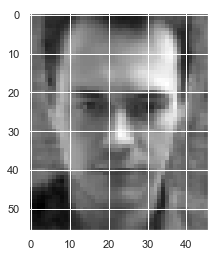

In [1449]:
A_reconstruct = average_face + np.dot(pre_recon, PCA)

print(A_reconstruct.real)
print(A_reconstruct.shape)

A_reconstruct = A_reconstruct.real


face_recon = A_reconstruct.T[:,1].reshape(46,56)
plt.imshow(face_recon.T, cmap = 'gist_gray')

In [1450]:
#print(A_reconstruct.shape)
#print(norm_face.shape)

#Total_err = 0

#for i in range (0,416):
#    ERR = np.linalg.norm(norm_face[:,i]-A_reconstruct.T[:,i])
#    print(ERR)
#    Total_err = Total_err + ERR
#print(Total_err)



## Nearest Neighbor Classification

In [1451]:
face_test_n_transform = face_test.T - average_face_test.T
face_test_n = face_test_n_transform.T
print(face_test_n.shape)



(2576, 104)


In [1473]:
from sklearn.neighbors import KNeighborsClassifier

N = 416
PP = 104

PCA = np.array([eigvecs[:,i] for i in range (M)])
W = np.array([np.dot(face_test_n[:,2].T, PCA.T) for P in range (PP)]) #this thing changed for all the arrays (matrices in matrix)
print(W)

Wn = np.dot(norm_face.T, PCA.T) 




Norm = np.array([np.linalg.norm(W - Wn[i,:]) for i in range (N)]) 
print(Norm.shape)
min_norm = min(Norm)
print(min_norm)
index_min = Norm.argmin()
print(index_min)



[[ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
    88.21512435+0.j   14.25778572+0.j   21.94695827+0.j]
 [ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
    88.21512435+0.j   14.25778572+0.j   21.94695827+0.j]
 [ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
    88.21512435+0.j   14.25778572+0.j   21.94695827+0.j]
 ...
 [ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
    88.21512435+0.j   14.25778572+0.j   21.94695827+0.j]
 [ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
    88.21512435+0.j   14.25778572+0.j   21.94695827+0.j]
 [ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
    88.21512435+0.j   14.25778572+0.j   21.94695827+0.j]]
(416,)
10334.575247161636
154


In [1474]:
print(face_train_id.shape)
face_train_id_arg = face_train_id[0, index_min]
print(face_train_id_arg)


(1, 416)
26


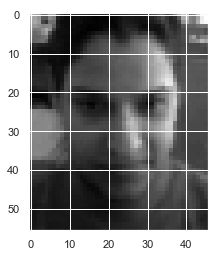

In [1475]:
test_image_nn = face_test[:,2].reshape(46,56)
plt.imshow(test_image_nn.T, cmap = 'gist_gray')

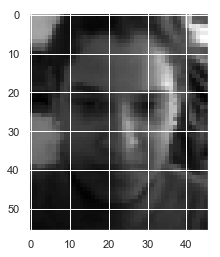

In [1476]:
train_image_nn = face_train[:,index_min].reshape(46,56)
plt.imshow(train_image_nn.T, cmap = 'gist_gray')

In [1456]:
from sklearn.metrics import accuracy_score
#accuracy_score(face_train_id_arg, face_test_id[:,0])


In [1457]:
classifier = KNeighborsClassifier(n_neighbors = 5) #setting up NN

face_test_pca = np.dot(face_test_n.T, PCA.T)  #applying PCA to test set as well

classifier.fit(Wn, face_train_id.ravel())  #fitting data
face_predict = classifier.predict(face_test_pca.real)


accuracy_score(face_predict, face_test_id.ravel())  #checking accuracy

/Users/Freshbox/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.3942307692307692

## Accuracy Graph


In [1401]:
M_min = 1
M_max = 417
b = 0
acc_score = []

for M in range(M_min, M_max):
    PCA_graph = np.array([eigvecs[:,i] for i in range (M)])
    Wn_graph = np.dot(norm_face.T, PCA_graph.T) 
    face_test_pca_graph = np.dot(face_test_n.T, PCA_graph.T)
    
    classifier.fit(Wn_graph, face_train_id.ravel())
    face_predict_graph = classifier.predict(face_test_pca_graph.real)
    acc_score.append(accuracy_score(face_predict_graph, face_test_id.ravel())*100)  #checking accuracy
   
    b += 1
    
    
acc_score_l = np.asarray(acc_score)
print(acc_score_l)

print(b)



/Users/Freshbox/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[ 4.80769231  8.65384615 10.57692308 17.30769231 25.96153846 27.88461538
 26.92307692 29.80769231 33.65384615 37.5        39.42307692 39.42307692
 41.34615385 41.34615385 43.26923077 43.26923077 44.23076923 44.23076923
 46.15384615 48.07692308 47.11538462 47.11538462 48.07692308 48.07692308
 48.07692308 50.         49.03846154 50.96153846 50.96153846 50.96153846
 50.96153846 50.         50.         50.         50.         50.96153846
 51.92307692 50.96153846 50.96153846 50.96153846 52.88461538 51.92307692
 51.92307692 50.96153846 51.92307692 51.92307692 51.92307692 51.92307692
 51.92307692 51.92307692 51.92307692 52.88461538 54.80769231 54.80769231
 54.80769231 55.76923077 55.76923077 55.76923077 54.80769231 55.76923077
 55.76923077 55.76923077 56.73076923 56.73076923 56.73076923 56.73076923
 55.76923077 55.76923077 55.76923077 55.76923077 56.73076923 55.76923077
 55.76923077 55.76923077 55.76923077 56.73076923 56.73076923 56.73076923
 57.69230769 56.73076923 56.73076923 55.76923077 55

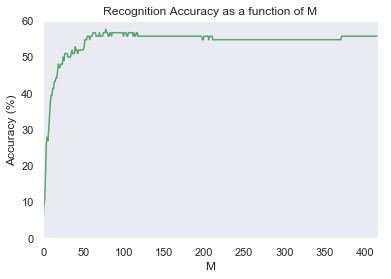

In [1402]:
plt.figure()
x=np.arange(0, 2576, 1)
plt.axis([0,416, 0, 60])
plt.plot(acc_score_l, linewidth = 1.5, c = 'g')
plt.title('Recognition Accuracy as a function of M')
plt.ylabel('Accuracy (%)')
plt.xlabel('M')
plt.grid(False)
plt.savefig('RecAcc.pdf', format='pdf', dpi=300)
plt.show()


## Confusion Matrix 

(104,)
(104,)
(47, 47)


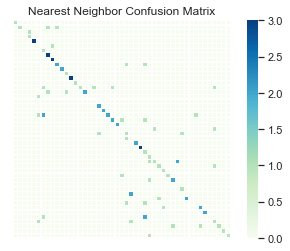

In [1280]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure()
conf_mat = confusion_matrix(face_test_id.ravel(), face_predict.ravel())
print(face_test_id.ravel().shape)
print(face_predict.shape)
print(conf_mat.shape)
ax = plt.axes()
ax.set_title('Nearest Neighbor Confusion Matrix')
sns.heatmap(conf_mat_l, ax = ax, cmap="GnBu", linewidth=0.1, yticklabels = False, xticklabels = False,square=True)
plt.savefig('Conf_Mat_NN.pdf', format='pdf', dpi=300)
plt.show()




## Alternative Method (array of arrays)

In [1281]:
"""PP = 104
M = 123
n = 52


PCA = np.array([eigvecs[:,i] for i in range (M)])
#W = np.array([np.dot(face_test_n[:,P].T, PCA.T) for P in range (PP)]) #this thing changed for all the arrays (matrices in matrix)
#print(W)

#finding the classes
Wns =[[] for _ in range(n)]
Wns_id = [[] for _ in range(n)]
i = 0
print(Wns)
print(Wns_id)
print('SUKA')
print(len(face_train_id.ravel()))
while i < len(face_train_id.ravel()): 
    Wns_idx = face_train_id.ravel()[i]
    Wns[Wns_idx-1] = face_train[:,i]
    Wns_id[Wns_idx-1] = face_train_id.ravel()[i]
    i += 1
Wns = np.asarray(Wns)
print(Wns.shape)
print(Wns_id)


#Wn = np.dot(norm_face.T, PCA.T) 
#print(Wn)
"""

"PP = 104\nM = 123\nn = 52\n\n\nPCA = np.array([eigvecs[:,i] for i in range (M)])\n#W = np.array([np.dot(face_test_n[:,P].T, PCA.T) for P in range (PP)]) #this thing changed for all the arrays (matrices in matrix)\n#print(W)\n\n#finding the classes\nWns =[[] for _ in range(n)]\nWns_id = [[] for _ in range(n)]\ni = 0\nprint(Wns)\nprint(Wns_id)\nprint('SUKA')\nprint(len(face_train_id.ravel()))\nwhile i < len(face_train_id.ravel()): \n    Wns_idx = face_train_id.ravel()[i]\n    Wns[Wns_idx-1] = face_train[:,i]\n    Wns_id[Wns_idx-1] = face_train_id.ravel()[i]\n    i += 1\nWns = np.asarray(Wns)\nprint(Wns.shape)\nprint(Wns_id)\n\n\n#Wn = np.dot(norm_face.T, PCA.T) \n#print(Wn)\n"

## Alternative Method

## Creating the PCA-base from each class

In [1282]:
from sklearn.preprocessing import normalize

norm_face_data = normalize(face_data, axis = 0)
test_num = 2
total_test = []
aver_faces = []
all_subs = []

for class_id in range (1,53):
    train = norm_face_data.T[(class_id - 1)*10 : (class_id*10) - test_num]
    test = norm_face_data.T[(class_id)*10 - test_num : (class_id*10)]
    
    for i in test:
        total_test.append(i)

    train_aver = np.mean(train, axis = 0)
    aver_faces.append(train_aver)
    
    train_float = train.astype('float64')
    
    for i in range(8):
        
        train_float[i] = train_float[i] - train_aver
        
    cov_mat_l  = np.dot(train_float, train_float.T)/8
    
    eigenvals_l, eigenvecs_l = np.linalg.eig(cov_mat_l) 
    
    eigenvecs_all = []
    
    for i in eigenvecs_l:
        
        vec = np.dot(train_float.T, i)
        norm = np.linalg.norm(vec)
        
        eigenvecs_all.append(vec)
    
    eigenvecs_all = np.asarray(eigenvecs_all)
    
    all_subs.append(eigenvecs_all)
        

In [1283]:
total_test = np.asarray(total_test)   #coverting everything to arrays 
aver_faces = np.asarray(aver_faces)
all_subs = np.asarray(all_subs)

print(all_subs.shape)


(52, 8, 2576)


In [1284]:
from scipy.spatial.distance import euclidean

def recon_error(test_face, average_face_class, sub_class):

    face = test_face - average_face_class
    projected = np.dot(sub_class, face)
    
    reconstruct = np.add(average_face_class.T, np.dot(projected.T, sub_class))
    
    error = euclidean (test_face, reconstruct)
    
    return error, reconstruct


In [1285]:
import sys

guesstimations = []
all_errors = []

for img in total_test:
    test_img = img.reshape(2576,1)
    min_err = sys.float_info.max
    guess = -1
    
    class_errors = []
    
    for index in range (len(all_subs)):
        test_sub = all_subs[index]
        test_aver_face = aver_faces[index].reshape(2576,1)
        #print(test_sub)
        error, _ = recon_error(test_img, test_aver_face, test_sub)
        
        class_errors.append(error)
        
        if(error<min_err):
            min_err = error
            guess = index+1
        
    guesstimations.append(guess)
    all_errors.append(class_errors)
    
    all_errors_l = np.asarray(all_errors)
    
print(all_errors_l)
print(all_errors_l.shape)



[[0.38528504 0.57756075 0.5584016  ... 0.55897343 0.45155878 0.53654342]
 [0.37645406 0.57453294 0.55305564 ... 0.55609672 0.42686468 0.52217243]
 [0.36117458 0.29097409 0.3951954  ... 0.43090337 0.41978725 0.38712788]
 ...
 [0.42122098 0.4889037  0.52182527 ... 0.53698026 0.31589236 0.40709982]
 [0.42236267 0.43832423 0.49209569 ... 0.46638841 0.42601487 0.3991578 ]
 [0.40016869 0.39556561 0.48221446 ... 0.48570982 0.31098826 0.32960171]]
(104, 52)


In [1286]:
min_error_array = []
for x in range(0,104):
    
    minerror = np.argmin(all_errors_l[x, :])
    
    
    min_error_array.append(minerror)
    
min_error_array_l = np.asarray(min_error_array)

print(min_error_array_l.shape)
print(total_test.shape)


(104,)
(104, 2576)


In [1287]:

test_id = [0,0,1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14 , 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22,22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40 , 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51]


In [1288]:
test_id_l = np.asarray(test_id)
print(test_id_l.shape)
accuracy_score(min_error_array_l, test_id)

(104,)


0.7403846153846154

## Confusion Matx Alternate Method

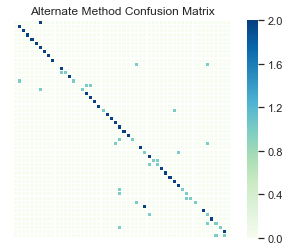

In [1289]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_mat = confusion_matrix(test_id_l.ravel(), min_error_array_l)
ax = plt.axes()
sns.heatmap(conf_mat, ax = ax, cmap="GnBu", linewidth = 0.1, xticklabels=False, yticklabels=False, square=True)
ax.set_title('Alternate Method Confusion Matrix')
plt.savefig('Conf_Mat_Alternate.pdf', format='pdf', dpi=300)
plt.show()

# Question 3: PCA-LDA

In [1290]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
Wn = sc.fit_transform(Wn.real)  
face_test_pca = sc.transform(face_test_pca)

/Users/Freshbox/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/Users/Freshbox/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype complex128 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1291]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=30)  

Wn_lda = lda.fit_transform(Wn, face_train_id.ravel())   #applying LDA to the PCA data

print(Wn_lda.shape)
face_test_pca_lda = lda.transform(face_test_pca)
print(face_test_pca_lda.shape)


 

(416, 30)
(104, 30)


In [1292]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)

classifier.fit(Wn_lda, face_train_id.ravel())
face_predict_pca_lda = classifier.predict(face_test_pca_lda)
accuracy_score(face_predict_pca_lda, face_test_id.ravel())  #checking accuracy


0.9038461538461539

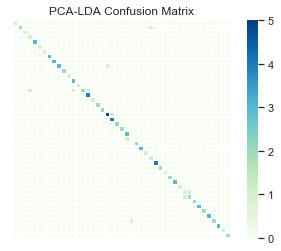

Accuracy0.9038461538461539


In [1293]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score


conf_mat_lda = confusion_matrix(face_test_id.T, face_predict_pca_lda)  
ax = plt.axes()
sns.heatmap(conf_mat_lda,ax = ax, cmap="GnBu", linewidth = 0.1, xticklabels=False, yticklabels=False, square=True)
ax.set_title('PCA-LDA Confusion Matrix')
plt.savefig('Conf_Mat_PCA-LDA.pdf', format='pdf', dpi=300)
plt.show()
print('Accuracy' + str(accuracy_score(face_test_id.ravel(), face_predict_pca_lda)))  

## PCA-LDA Ensemble